### script for merging convective classifications
### from different years into one file
### date created: 13 Oct. 2021
### author: doughert@ucar.edu

In [1]:
import math 
import numpy as np
import pandas as pd
import matplotlib as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4 as nc
from netCDF4 import Dataset, num2date
from datetime import datetime, date, timedelta
import glob
import xarray as xr
import geopandas as gp
#from wrf import getvar, ALL_TIMES

### import isolated convection

In [2]:
iso_conv_95 = pd.read_csv('/glade/scratch/doughert/grid_refl_out/isolated_convection_daily_bukovsky_regions_1995_1996.csv', header=0)
iso_conv_97 = pd.read_csv('/glade/scratch/doughert/grid_refl_out/isolated_convection_daily_bukovsky_regions_1997_1999.csv', header=0)
iso_conv_00 = pd.read_csv('/glade/scratch/doughert/grid_refl_out/isolated_convection_daily_bukovsky_regions_2000_2002.csv', header=0)
iso_conv_03 = pd.read_csv('/glade/scratch/doughert/grid_refl_out/isolated_convection_daily_bukovsky_regions_2003_2005.csv', header=0)
iso_conv_06 = pd.read_csv('/glade/scratch/doughert/grid_refl_out/isolated_convection_daily_bukovsky_regions_2006_2008.csv', header=0)
iso_conv_09 = pd.read_csv('/glade/scratch/doughert/grid_refl_out/isolated_convection_daily_bukovsky_regions_2009_2011.csv', header=0)
iso_conv_12 = pd.read_csv('/glade/scratch/doughert/grid_refl_out/isolated_convection_daily_bukovsky_regions_2012_2014.csv', header=0)
iso_conv_15 = pd.read_csv('/glade/scratch/doughert/grid_refl_out/isolated_convection_daily_bukovsky_regions_2015_2017.csv', header=0)

In [3]:
print(len(iso_conv_95))
print(len(iso_conv_97))
print(len(iso_conv_00))
print(len(iso_conv_03))
print(len(iso_conv_06))
print(len(iso_conv_09))
print(len(iso_conv_12))
print(len(iso_conv_15))

5024
7650
7651
7665
7663
7633
7629
7631


In [4]:
iso_conv_all = pd.concat([iso_conv_95, iso_conv_97, iso_conv_00, iso_conv_03, iso_conv_06, iso_conv_09, 
                          iso_conv_12, iso_conv_15])
iso_conv_all = iso_conv_all.drop(['Unnamed: 0'], axis=1)
iso_conv_all = iso_conv_all.rename({'time_x':'date'}, axis=1)
iso_conv_all['date'] = pd.to_datetime(iso_conv_all['date'])

In [5]:
print(iso_conv_all)

      region       date  occurrence  object_idx  size (km)    avg_dbz  \
0     Desert 1995-01-02         1.0    4.000000   6.000000  43.000000   
1     Desert 1995-01-03         NaN         NaN        NaN        NaN   
2     Desert 1995-01-04         1.0   76.500000  12.000000  42.301296   
3     Desert 1995-01-05         1.0   18.805556  28.111111  42.831813   
4     Desert 1995-01-06         1.0    9.500000  12.500000  43.810972   
...      ...        ...         ...         ...        ...        ...   
7626   South 2017-12-27         1.0    8.800000  21.900000  40.989964   
7627   South 2017-12-28         NaN         NaN        NaN        NaN   
7628   South 2017-12-29         NaN         NaN        NaN        NaN   
7629   South 2017-12-30         NaN         NaN        NaN        NaN   
7630   South 2017-12-31         1.0   11.000000  36.000000  42.917598   

        max_dbz  
0     43.000000  
1           NaN  
2     42.301296  
3     46.249856  
4     43.810972  
...         ...

### export df 

In [6]:
iso_conv_all.to_csv('Isolated_convection_daily_counts_bukovsky_regions.csv')

### separate df by region

In [7]:
iso_conv_pacnw = iso_conv_all[iso_conv_all['region']=='Pac_NW']
iso_conv_pacsw = iso_conv_all[iso_conv_all['region']=='Pac_SW']
iso_conv_mnt = iso_conv_all[iso_conv_all['region']=='MountainW']
iso_conv_desert = iso_conv_all[iso_conv_all['region']=='Desert']
iso_conv_gp = iso_conv_all[iso_conv_all['region']=='GP']
iso_conv_prr = iso_conv_all[iso_conv_all['region']=='Praire']
iso_conv_south = iso_conv_all[iso_conv_all['region']=='South']
iso_conv_lakes = iso_conv_all[iso_conv_all['region']=='Lakes']
iso_conv_east = iso_conv_all[iso_conv_all['region']=='East']

In [8]:
print(type(iso_conv_mnt['date'].iloc[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [9]:
dates_since_1995 = pd.DataFrame({'date':pd.date_range(start='1995-01-01', end='2017-12-31', freq='D')})

In [10]:
iso_conv_pacnw_time = iso_conv_pacnw.merge(dates_since_1995, how='right', on='date')
iso_conv_pacsw_time = iso_conv_pacsw.merge(dates_since_1995, how='right', on='date')
iso_conv_mnt_time = iso_conv_mnt.merge(dates_since_1995, how='right', on='date')
iso_conv_desert_time = iso_conv_desert.merge(dates_since_1995, how='right', on='date')
iso_conv_gp_time = iso_conv_gp.merge(dates_since_1995, how='right', on='date')
iso_conv_prr_time = iso_conv_prr.merge(dates_since_1995, how='right', on='date')
iso_conv_south_time = iso_conv_south.merge(dates_since_1995, how='right', on='date')
iso_conv_lakes_time = iso_conv_lakes.merge(dates_since_1995, how='right', on='date')
iso_conv_east_time = iso_conv_east.merge(dates_since_1995, how='right', on='date')

### repalces Nans with 0 occurrence

In [11]:
iso_conv_pacnw_time = iso_conv_pacnw_time.fillna({"occurrence":0})
iso_conv_pacsw_time = iso_conv_pacsw_time.fillna({"occurrence":0})
iso_conv_mnt_time = iso_conv_mnt_time.fillna({"occurrence":0})
iso_conv_desert_time = iso_conv_desert_time.fillna({"occurrence":0})
iso_conv_gp_time = iso_conv_gp_time.fillna({"occurrence":0})
iso_conv_prr_time = iso_conv_prr_time.fillna({"occurrence":0})
iso_conv_south_time = iso_conv_south_time.fillna({"occurrence":0})
iso_conv_lakes_time = iso_conv_lakes_time.fillna({"occurrence":0})
iso_conv_east_time = iso_conv_east_time.fillna({"occurrence":0})

#### drop duplicates

In [12]:
iso_conv_mnt_time = iso_conv_mnt_time.drop_duplicates(subset=['date'],keep='first')
iso_conv_desert_time = iso_conv_desert_time.drop_duplicates(subset=['date'],keep='first')
iso_conv_gp_time = iso_conv_gp_time.drop_duplicates(subset=['date'],keep='first')
iso_conv_prr_time = iso_conv_prr_time.drop_duplicates(subset=['date'],keep='first')
iso_conv_south_time = iso_conv_south_time.drop_duplicates(subset=['date'],keep='first')
iso_conv_lakes_time = iso_conv_lakes_time.drop_duplicates(subset=['date'],keep='first')
iso_conv_east_time = iso_conv_east_time.drop_duplicates(subset=['date'],keep='first')

In [13]:
print(len(iso_conv_east_time))
#print(iso_conv_east_time)


8401


In [14]:
iso_conv_len_mnt = np.where(iso_conv_mnt_time['occurrence']==1.0)[0]
iso_conv_len_desert = np.where(iso_conv_desert_time['occurrence']==1.0)[0]
iso_conv_len_gp = np.where(iso_conv_gp_time['occurrence']==1.0)[0]
iso_conv_len_prr = np.where(iso_conv_prr_time['occurrence']==1.0)[0]
iso_conv_len_south = np.where(iso_conv_south_time['occurrence']==1.0)[0]
iso_conv_len_lakes = np.where(iso_conv_lakes_time['occurrence']==1.0)[0]
iso_conv_len_east = np.where(iso_conv_east_time['occurrence']==1.0)[0]
iso_conv_len_pacnw = np.where(iso_conv_pacnw_time['occurrence']==1.0)[0]
iso_conv_len_pacsw = np.where(iso_conv_pacsw_time['occurrence']==1.0)[0]

In [15]:
print('total # in east:', len(iso_conv_len_east))
print('total # in south:',len(iso_conv_len_south))
print('total # in lakes:',len(iso_conv_len_lakes))
print('total # in prrr:',len(iso_conv_len_prr))
print('total # in gp:',len(iso_conv_len_gp))
print('total # in mnt:',len(iso_conv_len_mnt))
print('total # in desert:',len(iso_conv_len_desert))
print('total # in pacsw:',len(iso_conv_len_pacsw))
print('total # in pacnw:',len(iso_conv_len_pacnw))

total # in east: 7192
total # in south: 7719
total # in lakes: 5168
total # in prrr: 6026
total # in gp: 7209
total # in mnt: 5438
total # in desert: 5852
total # in pacsw: 0
total # in pacnw: 0


In [16]:
print('avg # in east:', len(iso_conv_len_east)/23)
print('avg # in south:',len(iso_conv_len_south)/23)
print('avg # in lakes:',len(iso_conv_len_lakes)/23)
print('avg # in prrr:',len(iso_conv_len_prr)/23)
print('avg # in gp:',len(iso_conv_len_gp)/23)
print('avg # in mnt:',len(iso_conv_len_mnt)/23)
print('avg # in desert:',len(iso_conv_len_desert)/23)
print('avg # in pacsw:',len(iso_conv_len_pacsw)/23)
print('avg # in pacnw:',len(iso_conv_len_pacnw)/23)

avg # in east: 312.69565217391306
avg # in south: 335.60869565217394
avg # in lakes: 224.69565217391303
avg # in prrr: 262.0
avg # in gp: 313.4347826086956
avg # in mnt: 236.43478260869566
avg # in desert: 254.43478260869566
avg # in pacsw: 0.0
avg # in pacnw: 0.0


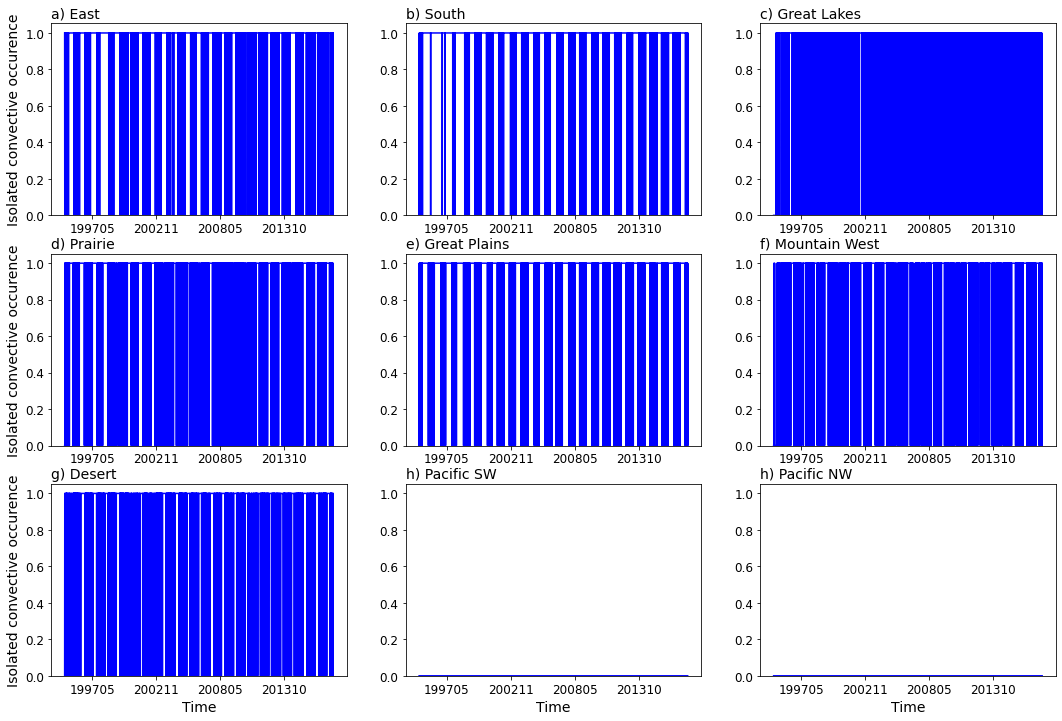

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

fig = plt.figure(figsize = (18,12))
date_plot = matplotlib.dates.date2num(iso_conv_east_time['date'])
date_fmt = matplotlib.dates.DateFormatter('%Y%m')

ax1 = plt.subplot(3, 3, 1, )
ax1.plot(date_plot, iso_conv_east_time['occurrence'], c='b')
#ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Isolated convective occurence', fontsize=14)
ax1.tick_params(axis='both',labelsize=12)
ax1.xaxis.set_major_formatter(date_fmt)
ax1.set_ylim(0,1.052)
ax1.set_title('a) East', loc='left', fontsize=14)

ax2 = plt.subplot(3, 3, 2,)
ax2.plot(date_plot, iso_conv_south_time['occurrence'], c='b')
#ax2.set_xlabel('Time', fontsize=14)
#ax2.set_ylabel('TC occurence', fontsize=14)
ax2.tick_params(axis='both',labelsize=12)
ax2.xaxis.set_major_formatter(date_fmt)
ax2.set_ylim(0,1.052)
ax2.set_title('b) South', loc='left', fontsize=14)

ax3 = plt.subplot(3, 3, 3, sharex=ax1)
ax3.plot(date_plot, iso_conv_lakes_time['occurrence'], c='b')
#ax3.set_xlabel('Time', fontsize=14)
#ax3.set_ylabel('TC occurence', fontsize=14)
ax3.tick_params(axis='both',labelsize=12)
ax3.xaxis.set_major_formatter(date_fmt)
ax3.set_ylim(1995,2015)
ax3.set_ylim(0,1.052)
ax3.set_title('c) Great Lakes', loc='left', fontsize=14)


ax4 = plt.subplot(3, 3, 4,sharex=ax1)
ax4.plot(date_plot, iso_conv_prr_time['occurrence'], c='b')
#ax4.set_xlabel('Time', fontsize=14)
ax4.set_ylabel('Isolated convective occurence', fontsize=14)
ax4.tick_params(axis='both',labelsize=12)
ax4.xaxis.set_major_formatter(date_fmt)
ax4.set_ylim(0,1.052)
ax4.set_title('d) Prairie', loc='left', fontsize=14)


ax5 = plt.subplot(3, 3, 5,sharex=ax2)
ax5.plot(date_plot, iso_conv_gp_time['occurrence'], c='b')
#ax5.set_xlabel('Time', fontsize=14)
#ax5.set_ylabel('TC occurence', fontsize=14)
ax5.tick_params(axis='both',labelsize=12)
ax5.xaxis.set_major_formatter(date_fmt)
ax5.set_ylim(0,1.052)
ax5.set_title('e) Great Plains', loc='left', fontsize=14)


ax6 = plt.subplot(3, 3, 6,sharex=ax2)
ax6.plot(date_plot, iso_conv_mnt_time['occurrence'], c='b')
#ax6.set_xlabel('Time', fontsize=14)
#ax6.set_ylabel('TC occurence', fontsize=14)
ax6.tick_params(axis='both',labelsize=12)
ax6.xaxis.set_major_formatter(date_fmt)
ax6.set_ylim(0,1.052)
ax6.set_title('f) Mountain West', loc='left', fontsize=14)


ax7 = plt.subplot(3, 3, 7,sharex=ax2)
ax7.plot(date_plot, iso_conv_desert_time['occurrence'], c='b')
ax7.set_xlabel('Time', fontsize=14)
ax7.set_ylabel('Isolated convective occurence', fontsize=14)
ax7.tick_params(axis='both',labelsize=12)
ax7.xaxis.set_major_formatter(date_fmt)
ax7.set_ylim(0,1.052)
ax7.set_title('g) Desert', loc='left', fontsize=14)


ax8 = plt.subplot(3, 3, 8,sharex=ax2)
ax8.plot(date_plot, iso_conv_pacsw_time['occurrence'], c='b')
ax8.set_xlabel('Time', fontsize=14)
#ax8.set_ylabel('TC occurence', fontsize=14)
ax8.tick_params(axis='both',labelsize=12)
ax8.xaxis.set_major_formatter(date_fmt)
ax8.set_ylim(0,1.052)
ax8.set_title('h) Pacific SW', loc='left', fontsize=14)


ax9 = plt.subplot(3, 3, 9,sharex=ax2)
ax9.plot(date_plot, iso_conv_pacsw_time['occurrence'], c='b')
ax9.set_xlabel('Time', fontsize=14)
#ax9.set_ylabel('TC occurence', fontsize=14)
ax9.tick_params(axis='both',labelsize=12)
ax9.xaxis.set_major_formatter(date_fmt)
ax9.set_ylim(0,1.052)
ax9.set_title('h) Pacific NW', loc='left', fontsize=14)

plt.savefig('isolated_convection_Bukovsky_regions_1995–2017.png', bbox_inches='tight', transparent=False, facecolor='white', dpi=250)
plt.show()